In [1]:
import numpy as np
import sim_probCCA as sc
import canon_corr as cca
import prob_cca as pcca
import matplotlib.pyplot as plt

xDim,yDim,zDim = 30,20,5

# simulate from pCCA model
pcca_sim = sc.sim_probCCA(xDim,yDim,zDim,rand_seed=0)
X,Y = pcca_sim.sim_data(1000,rand_seed=0)


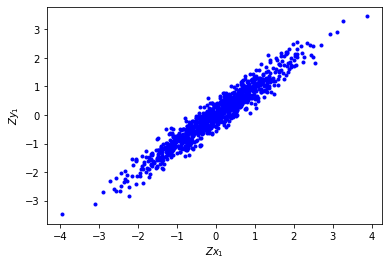

In [2]:
# vanilla CCA
cca_model = cca.canon_corr()
cca_model.train(X,Y,zDim)
Zx,Zy = cca_model.proj_data(X,Y)

plt.figure(0)
plt.plot(Zx[:,0],Zy[:,0],'b.')
plt.xlabel('$Zx_{1}$')
plt.ylabel('$Zy_{1}$')
plt.show()


In [3]:
# # pCCA
# pcca_model = pcca.prob_cca()
# pcca_model.train_maxLL(X,Y,zDim)
# z_pcca,curr_LL = pcca_model.estep(X,Y)
# z_orth,Worth = pcca_model.orthogonalize(z_pcca['zx_mu'],z_pcca['zy_mu'])
# Z_x = z_pcca['zx_mu']
# Z_y = z_pcca['zy_mu']

# plt.figure(1)
# plt.plot(Z_x[:,0],Z_y[:,0],'b.')
# plt.xlabel('$Zx_{1}$')
# plt.ylabel('$Zy_{1}$')
# plt.show()


Crossvalidating pCCA model to choose # of dims...
   Fold  1  of  10 ...
   Fold  2  of  10 ...
   Fold  3  of  10 ...
   Fold  4  of  10 ...
   Fold  5  of  10 ...
   Fold  6  of  10 ...
   Fold  7  of  10 ...
   Fold  8  of  10 ...
   Fold  9  of  10 ...
   Fold  10  of  10 ...


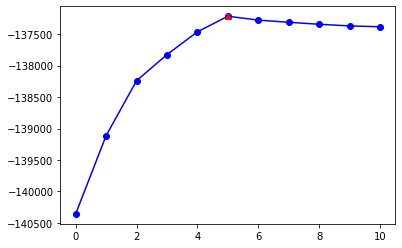

In [4]:
# crossvalidate pCCA
pcca_model = pcca.prob_cca()
LLs,zDim_list,max_LL,zDim = pcca_model.crossvalidate(X,Y)

plt.figure(0)
plt.plot(zDim_list,LLs,'bo-')
plt.plot(zDim,max_LL,'r^')
plt.show()
